### Transforming Data Into a Time Series Format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def convert_data_to_timeseries(input_file, column, verbose=False):
    # Load the input file
    data = np.loadtxt(input_file, delimiter=',')

    # Extract the start and end dates
    start_date = str(int(data[0,0])) + '-' + str(int(data[0,1]))
    end_date = str(int(data[-1,0] + 1)) + '-' + str(int(data[-1,1] % 12 + 1))

    if verbose:
        print("Start date =", start_date)
        print("End date =", end_date)

    # Create a date sequence with monthly intervals
    dates = pd.date_range(start_date, end_date, freq='M')

    # Convert the data into time series data
    data_timeseries = pd.Series(data[:,column], index=dates)

    if verbose:
        print("Time series data:\n", data_timeseries[:10])

    return data_timeseries


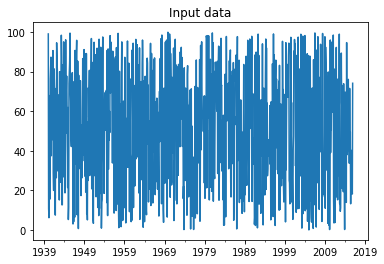

In [3]:
if __name__=='__main__':
    # Input file containing data
    input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/data_timeseries.txt'

    # Load input data
    column_num = 2
    data_timeseries = convert_data_to_timeseries(input_file, column_num)

    # Plot the time series data
    data_timeseries.plot()
    plt.title('Input data')

    plt.show()

### Slicing Time Series Data

In [4]:
import matplotlib.pyplot as plt

from convert_to_timeseries import convert_data_to_timeseries

In [5]:
# Input file containing data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/data_timeseries.txt'

# Load data
column_num = 2
data_timeseries = convert_data_to_timeseries(input_file, column_num)

Text(0.5, 1.0, 'Data from 2008 to 2015')

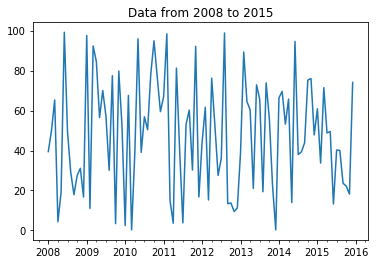

In [6]:
# Plot within a certain year range
start = '2008'
end = '2015'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)

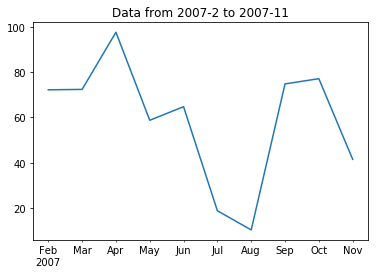

In [7]:
# Plot within a certain range of dates
start = '2007-2'
end = '2007-11'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)

plt.show()

### Operating on Time Series Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from convert_to_timeseries import convert_data_to_timeseries

In [9]:
# Input file containing data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/data_timeseries.txt'

# Load data
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
dataframe = pd.DataFrame({'first': data1, 'second': data2})

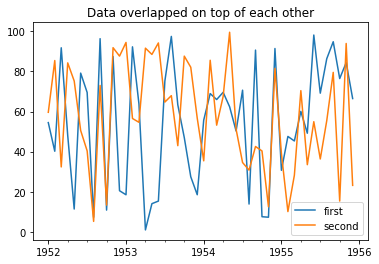

In [10]:
# Plot data
dataframe['1952':'1955'].plot()
plt.title('Data overlapped on top of each other')
plt.savefig('Figure1.pdf',format='pdf', dpi=1000)

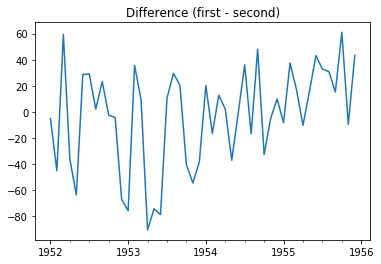

In [11]:
# Plot the difference
plt.figure()
difference = dataframe['1952':'1955']['first'] - dataframe['1952':'1955']['second']
difference.plot()
plt.title('Difference (first - second)')
plt.savefig('Figure2.pdf',format='pdf', dpi=1000)

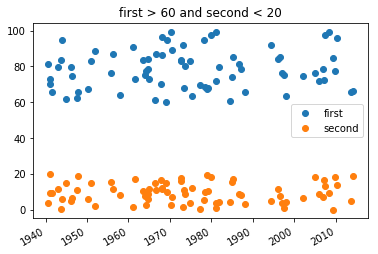

In [12]:
# When 'first' is greater than a certain threshold
# and 'second' is smaller than a certain threshold
dataframe[(dataframe['first'] > 60) & (dataframe['second'] < 20)].plot(style='o')
plt.title('first > 60 and second < 20')
plt.savefig('Figure3.pdf',format='pdf', dpi=1000)
plt.show()

### Extracting Statistics From Time Series Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from convert_to_timeseries import convert_data_to_timeseries

In [14]:
# Input file containing data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/data_timeseries.txt'

# Load data
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
dataframe = pd.DataFrame({'first': data1, 'second': data2})

In [15]:
# Print max and min
print('Maximum:\n', dataframe.max())
print('Minimum:\n', dataframe.min())

Maximum:
 first     99.82
second    99.97
dtype: float64
Minimum:
 first     0.07
second    0.00
dtype: float64


In [16]:
# Print mean
print('Mean:\n', dataframe.mean())
print('Mean row-wise:\n', dataframe.mean(1)[:10])

Mean:
 first     51.264529
second    49.695417
dtype: float64
Mean row-wise:
 1940-01-31    81.885
1940-02-29    41.135
1940-03-31    10.305
1940-04-30    83.545
1940-05-31    18.395
1940-06-30    16.695
1940-07-31    86.875
1940-08-31    42.255
1940-09-30    55.880
1940-10-31    34.720
Freq: M, dtype: float64


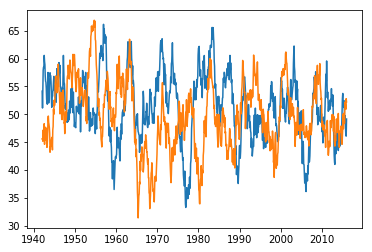

In [17]:
# Plot rolling mean
DFMean = dataframe.rolling(window=24).mean()
plt.plot(DFMean)

In [18]:
# Print correlation coefficients
print('Correlation coefficients:\n', dataframe.corr())

Correlation coefficients:
            first    second
first   1.000000  0.077607
second  0.077607  1.000000


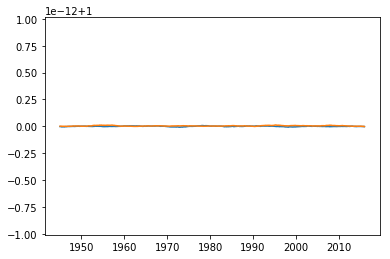

In [19]:
# Plot rolling correlation
plt.figure()

DFCorr= dataframe.rolling(window=60).corr(pairwise=False)
plt.plot(DFCorr)
plt.show()

### Building HMMs for Sequential Data

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [21]:
# Load data from input file
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/data_hmm.txt'
data = np.loadtxt(input_file, delimiter=',')

# Arrange data for training 
X = np.column_stack([data[:,2]])

In [22]:
# Create and train Gaussian HMM 
print("Training HMM....")
num_components = 4
model = GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model.fit(X)

Training HMM....


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [23]:
# Predict the hidden states of HMM 
hidden_states = model.predict(X)

In [24]:
print("Means and variances of hidden states:")
for i in range(model.n_components):
    print("Hidden state", i+1)
    print("Mean =", round(model.means_[i][0], 3))
    print("Variance =", round(np.diag(model.covars_[i])[0], 3))

Means and variances of hidden states:
Hidden state 1
Mean = 5.092
Variance = 0.677
Hidden state 2
Mean = 0.6
Variance = 0.254
Hidden state 3
Mean = 8.099
Variance = 0.678
Hidden state 4
Mean = 2.601
Variance = 0.257


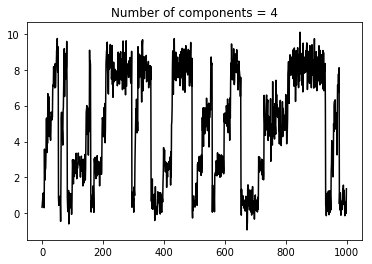

In [25]:
# Generate data using model
num_samples = 1000
samples, _ = model.sample(num_samples) 
plt.plot(np.arange(num_samples), samples[:,0], c='black')
plt.title('Number of components = ' + str(num_components))

plt.show()

### Building CRFs For Sequential Text Data

In [26]:
import numpy as np
from pystruct.datasets import load_letters
from pystruct.models import ChainCRF
from pystruct.learners import FrankWolfeSSVM

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
class CRFTrainer(object):
    def __init__(self, c_value, classifier_name='ChainCRF'):
        self.c_value = c_value
        self.classifier_name = classifier_name

        if self.classifier_name == 'ChainCRF':
            model = ChainCRF()
            self.clf = FrankWolfeSSVM(model=model, C=self.c_value, max_iter=50) 
        else:
            raise TypeError('Invalid classifier type')

    def load_data(self):
        letters = load_letters()
        X, y, folds = letters['data'], letters['labels'], letters['folds']
        X, y = np.array(X), np.array(y)
        return X, y, folds

    # X is a numpy array of samples where each sample
    # has the shape (n_letters, n_features) 
    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        return self.clf.score(X_test, y_test)

    # Run the classifier on input data
    def classify(self, input_data):
        return self.clf.predict(input_data)[0]

In [28]:
def decoder(arr):
    alphabets = 'abcdefghijklmnopqrstuvwxyz'
    output = ''
    for i in arr:
        output += alphabets[i] 

    return output

In [29]:
if __name__=='__main__':
    c_value = 10

    crf = CRFTrainer(c_value)
    X, y, folds = crf.load_data()
    X_train, X_test = X[folds == 1], X[folds != 1]
    y_train, y_test = y[folds == 1], y[folds != 1]

    print("Training the CRF model...")
    crf.train(X_train, y_train)

    score = crf.evaluate(X_test, y_test)
    print("Accuracy score =", str(round(score*100, 2)) + '%')

    print("True label =", decoder(y_test[0]))
    predicted_output = crf.classify([X_test[0]])
    print("Predicted output =", decoder(predicted_output))

Training the CRF model...
Accuracy score = 77.03%
True label = ommanding
Predicted output = ommanging


### Analyzing Stock Market Data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed

In [31]:
seed(0)
path = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/'

Data = pd.read_csv(path + 'AMZN.csv',header=0, usecols=['Date', 'Close'],parse_dates=True,index_col='Date')
print(Data.info())
print(Data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-11-21 to 2018-11-21
Data columns (total 1 columns):
Close    4529 non-null float64
dtypes: float64(1)
memory usage: 70.8 KB
None
              Close
Date               
2000-11-21  24.2500
2000-11-22  25.1875
2000-11-24  28.9375
2000-11-27  28.0000
2000-11-28  25.0312


In [32]:
print(Data.describe())

             Close
count  4529.000000
mean    290.353723
std     407.211585
min       5.970000
25%      39.849998
50%     117.889999
75%     327.440002
max    2039.510010


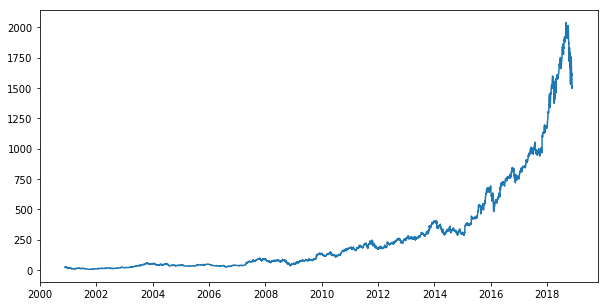

In [33]:
plt.figure(figsize=(10,5))
plt.plot(Data)
plt.show()

In [34]:
DataPCh = Data.pct_change()

LogReturns = np.log(1 + DataPCh) 
print(LogReturns.tail(10))

               Close
Date                
2018-11-08 -0.000330
2018-11-09 -0.024504
2018-11-12 -0.045140
2018-11-13 -0.003476
2018-11-14 -0.019913
2018-11-15  0.012696
2018-11-16 -0.016204
2018-11-19 -0.052251
2018-11-20 -0.011191
2018-11-21  0.014123


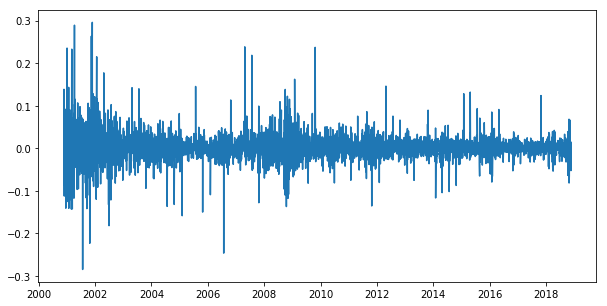

In [35]:
plt.figure(figsize=(10,5))
plt.plot(LogReturns)
plt.savefig('figure.pdf',format='pdf',dpi=1000)
plt.show()

### Using RNNs to Predict Time Series Data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed

In [39]:
seed(0)

Data = pd.read_csv(path + 'AMZN.csv',header=0, usecols=['Date', 'Close'],parse_dates=True,index_col='Date')

In [41]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
DataScaled = scaler.fit_transform(Data)

In [43]:
#Data splitting
np.random.seed(7)

TrainLen = int(len(DataScaled) * 0.70)
TestLen = len(DataScaled) - TrainLen
TrainData = DataScaled[0:TrainLen,:] 
TestData  = DataScaled[TrainLen:len(DataScaled),:]

print(len(TrainData), len(TestData))

3170 1359


In [45]:
def DatasetCreation(dataset, TimeStep=1):
    DataX, DataY = [], []
    for i in range(len(dataset)-TimeStep-1):
        a = dataset[i:(i+TimeStep), 0]
        DataX.append(a)
        DataY.append(dataset[i + TimeStep, 0])
    return np.array(DataX), np.array(DataY)

In [46]:
TimeStep = 1
TrainX, TrainY = DatasetCreation(TrainData, TimeStep)
TestX, TestY = DatasetCreation(TestData, TimeStep)

TrainX = np.reshape(TrainX, (TrainX.shape[0], 1, TrainX.shape[1]))
TestX = np.reshape(TestX, (TestX.shape[0], 1, TestX.shape[1]))

In [49]:
#Keras LSTM model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(256, input_shape=(1, TimeStep)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(TrainX, TrainY, epochs=1, batch_size=1, verbose=1)
model.summary()

Using TensorFlow backend.
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hussam/anaconda3/envs/p

Epoch 1/1
3168/3168 [==============================] - 21s 7ms/step - loss: 0.0049 - acc: 3.1566e-04
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [50]:
score = model.evaluate(TrainX, TrainY, verbose=0)
print('Keras Model Loss = ',score[0])
print('Keras Model Accuracy = ',score[1])

Keras Model Loss =  0.00018169946173946465
Keras Model Accuracy =  0.0003156565656565657


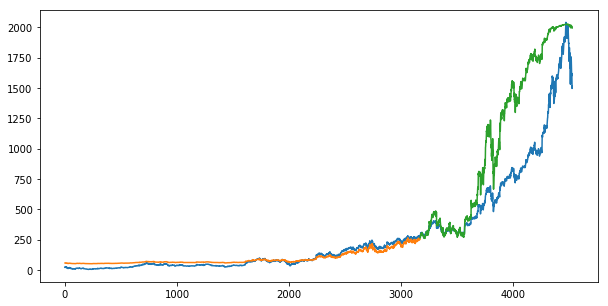

In [51]:
TrainPred = model.predict(TrainX)
TestPred = model.predict(TestX)

TrainPred = scaler.inverse_transform(TrainPred)
TrainY = scaler.inverse_transform([TrainY])

TestPred = scaler.inverse_transform(TestPred)
TestY = scaler.inverse_transform([TestY])

TrainPredictPlot = np.empty_like(DataScaled)
TrainPredictPlot[:, :] = np.nan
TrainPredictPlot[1:len(TrainPred)+1, :] = TrainPred

TestPredictPlot = np.empty_like(DataScaled)
TestPredictPlot[:, :] = np.nan
TestPredictPlot[len(TrainPred)+(1*2)+1:len(DataScaled)-1, :] = TestPred

plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(DataScaled))
plt.plot(TrainPredictPlot)
plt.plot(TestPredictPlot)
plt.show()